In [29]:
import numpy as np
import pandas as pd

In [30]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import distance_modules as d
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)
importlib.reload(d)

<module 'distance_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\distance_modules.py'>

In [31]:
sample_size, nr_sample = 100, 20
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
st_bounded_samples = dm.standardize_df(bounded_samples)

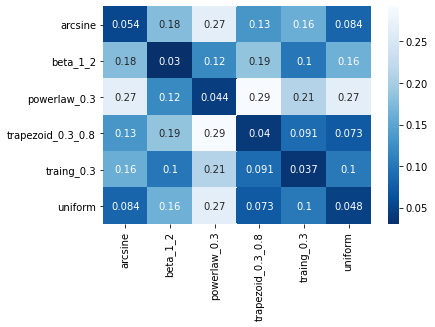

In [5]:
original_d, original_std = d.w_distance(bounded_samples)
d.plot_matrix(original_d, bounded_samples.iloc[:,-1].unique())

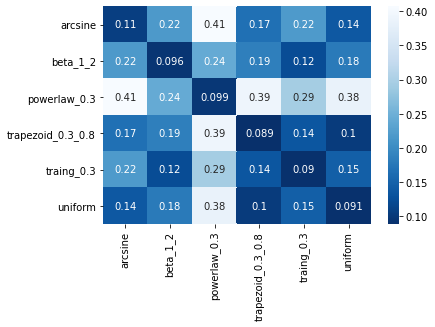

In [6]:
original_d, original_std = d.w_distance(st_bounded_samples)
d.plot_matrix(original_d, st_bounded_samples.iloc[:,-1].unique())

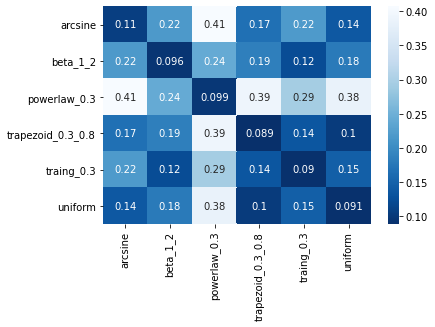

(1.0, 0.0)

In [7]:
nr_moments = 4
moments_df = dem.get_moments(st_bounded_samples, nr_moments)
moments_d, moments_std = d.w_distance(st_bounded_samples)
d.plot_matrix(moments_d, st_bounded_samples.iloc[:,-1].unique())
d.corr_coef(original_d,moments_d)

In [40]:
num_steps = 5
x_b = np.linspace(0,1,num_steps)
kde_df = dem.get_kde(bounded_samples, x_b)
edf_df = dem.get_edf(bounded_samples, x_b)

max_t = 20
t = np.linspace(max_t/num_steps, max_t, num_steps)
ecf_df = dem.get_ecf(bounded_samples, t)

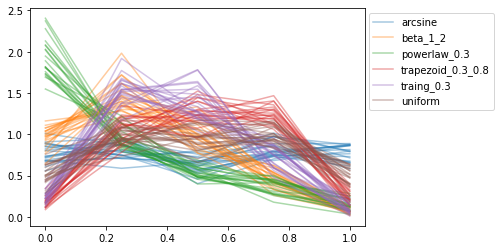

In [41]:
dem.get_kde_plot(kde_df,x_b)

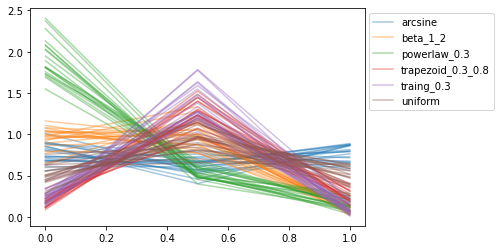

In [37]:
dem.get_kde_plot(kde_df,x_b)

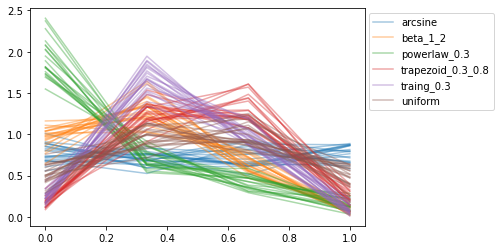

In [39]:
dem.get_kde_plot(kde_df,x_b)

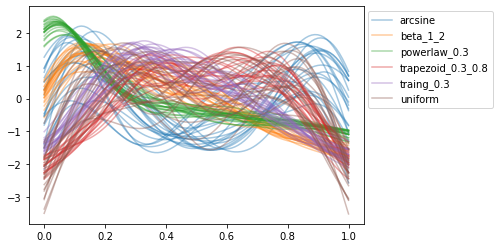

In [16]:
kde_st_df = dm.standardize_df(kde_df)
dem.get_kde_plot(kde_st_df,x_b)

In [187]:
original_d, original_std = d.w_distance(bounded_samples)

kde_d,  = d.w_distance(kde_df)

In [191]:
edf_d = d.w_distance(edf_df)

In [195]:
ecf_d = d.w_distance(ecf_df)

### Moments approach

In [38]:
sample_size_list = [5, 10, 25, 50, 100, 500, 1000]
nr_moments_list = list(range(2,21))

In [41]:
moments_res = d.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample)

Completed:   0%|          | 0/7 [00:00<?, ?it/s]

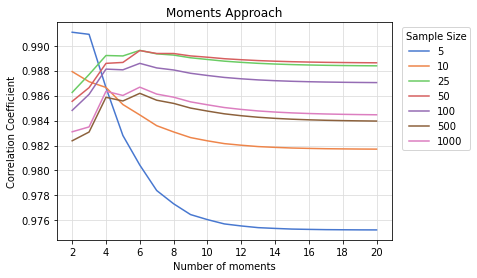

In [42]:
d.plot_cv_moments(moments_res)

In [45]:
moments_st_res = d.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample, standardize = True)

Completed:   0%|          | 0/7 [00:00<?, ?it/s]

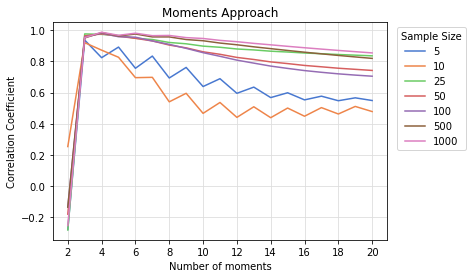

In [47]:
d.plot_cv_moments(moments_st_res)

### KDE

In [54]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = list(np.arange(1,21))

In [59]:
kde_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, 'kde')

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

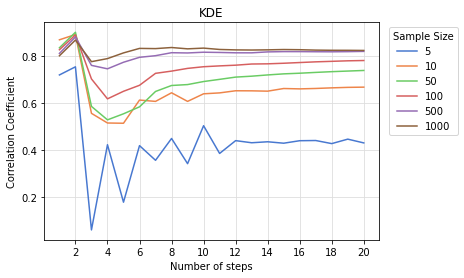

In [62]:
d.plot_cv_numsteps_samplesize(kde_res)

 steps 2 means a straight line, getting more steps catches the shape of the distributions. that's why there is a deep after 2

In [63]:
kde_st_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, 'kde', standardize=True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

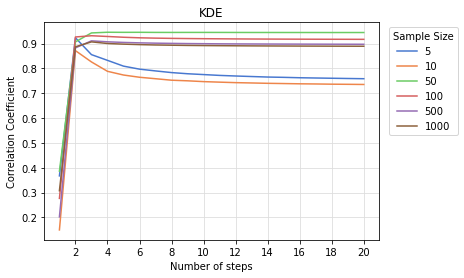

In [64]:
d.plot_cv_numsteps_samplesize(kde_st_res)

### EDF

In [65]:
edf_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, 'edf')

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

C:\Users\shfar\anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


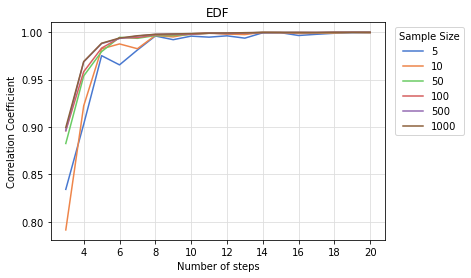

In [70]:
d.plot_cv_numsteps_samplesize(edf_res,'EDF')

In [71]:
edf_st_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, 'edf', standardize=True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

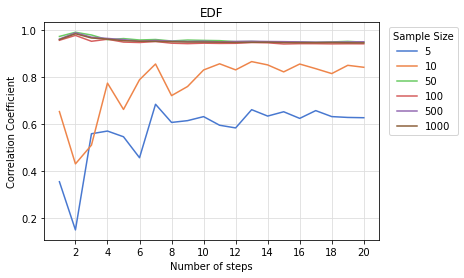

In [72]:
d.plot_cv_numsteps_samplesize(edf_st_res,'EDF')

### ECF

In [17]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = np.arange(1,21)
#max_t_list = [50, 100, 150, 200, 250, 500]
max_t_list = [50, 100]

In [18]:
ecf_res = d.cv_ecf(sample_size_list, max_t_list, num_steps_list, bounded_dists, nr_sample)

  0%|          | 0/6 [00:00<?, ?it/s]

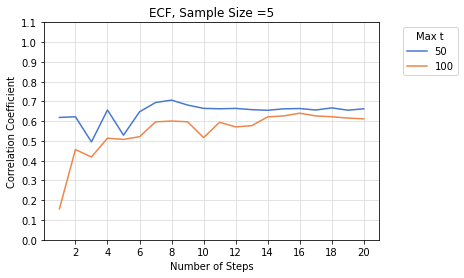

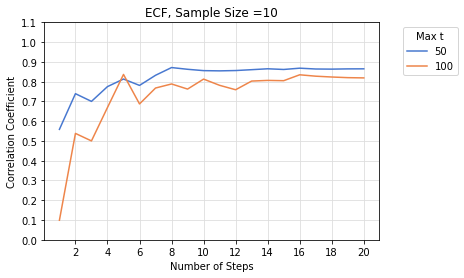

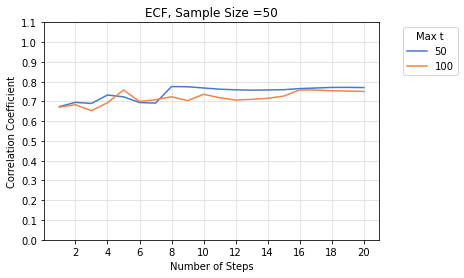

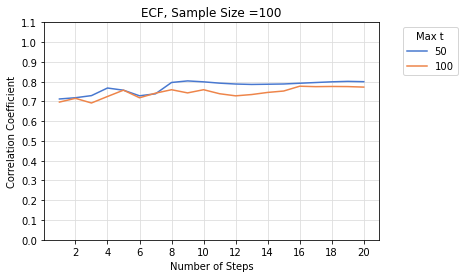

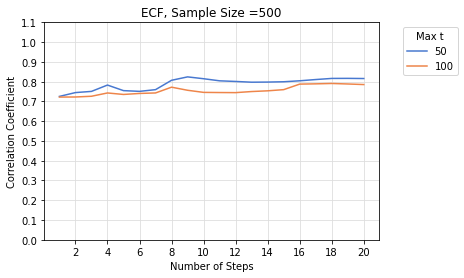

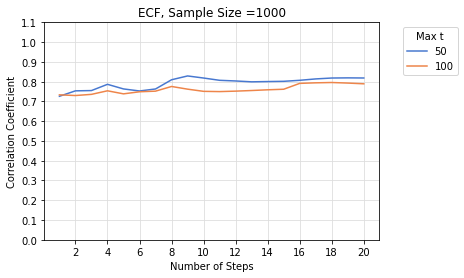

In [21]:
d.plot_cv_ecf(ecf_res)

In [22]:
ecf_st_res = d.cv_ecf(sample_size_list, max_t_list, num_steps_list, bounded_dists, nr_sample, standardize=True)

  0%|          | 0/6 [00:00<?, ?it/s]

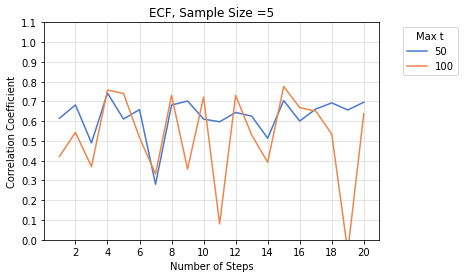

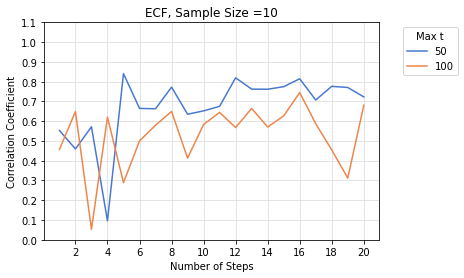

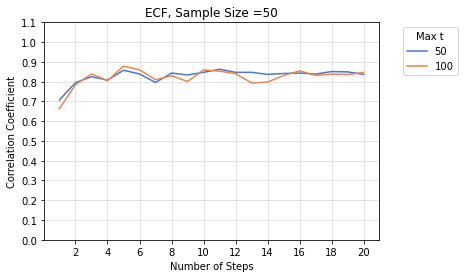

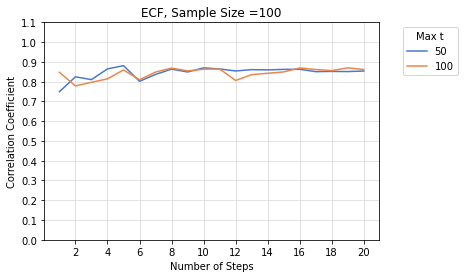

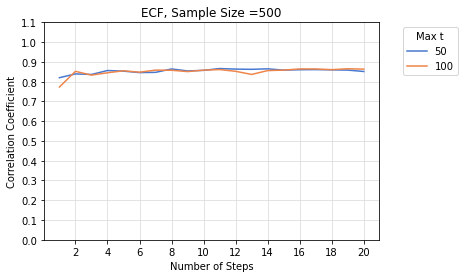

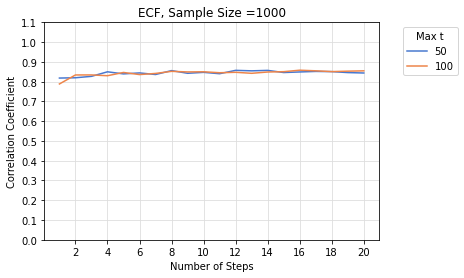

In [24]:
d.plot_cv_ecf(ecf_st_res)

In [1]:
from scipy.stats import wasserstein_distance

In [27]:
a = [0.1,0.3,0.7,0.1]
b = [0.2,0.3,0.5,0.1]

In [28]:
wasserstein_distance(a,b)

0.07499999999999998

In [24]:
a = [0.1, 0.2, 0.4, 0.3]
b = [0.2, 0.1, 0.2, 0.5]

distance = wasserstein_distance(a, b)
print(distance)

0.04999999999999999


In [22]:
wasserstein_distance([0, 1, 3], [5, 6, 8])

5.0